In [2]:
import sys
import os

# Only add the project root to sys.path
root_path = os.path.abspath('..')
if root_path not in sys.path:
    sys.path.insert(0, root_path)

Detected Change Points: [1324  720 1782 2048 2609]
Detected Change Points by Floss: [1324  720 1782 2048 2609]
True Change Points: [10, 712, 1293, 1930, 2586]
F1 Score: 0.5
Covering Score: 0.8697737776420944


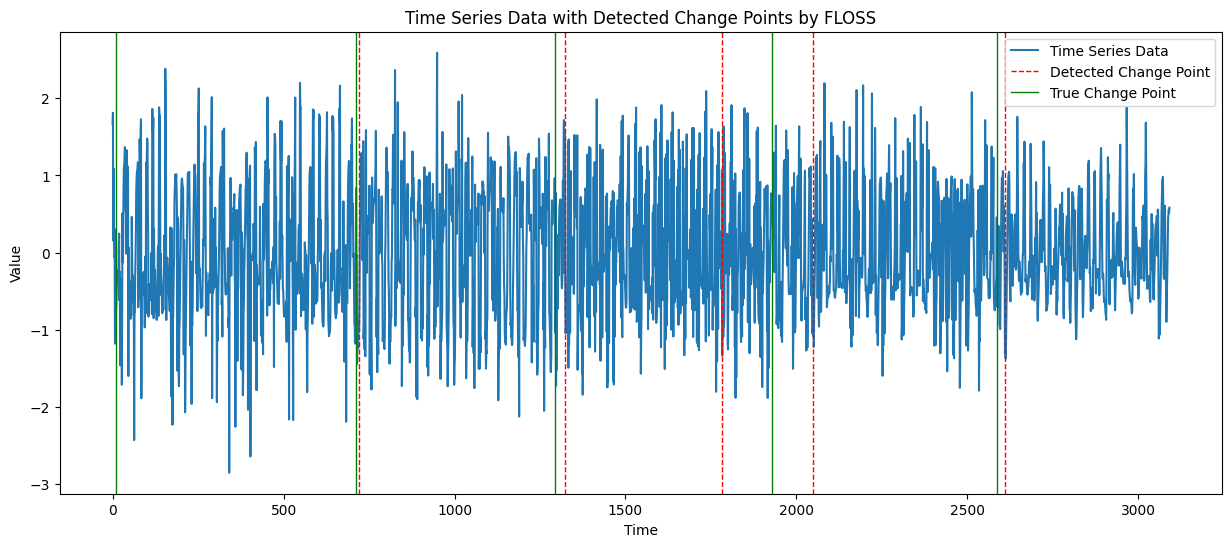

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Functions.metrics import f_measure, covering
from Functions.true_cps import read_true_change_points
from Algorithms.floss import floss

# Load the dataset
dataset_name = 'CricketX'

# Path to the dataset and description files assuming the current file is in the 'Tests' directory
data_path = os.path.join(root_path, 'Data', f'{dataset_name}.txt')
desc_path = os.path.join(root_path, 'Data', 'TrueCPS', 'desc.txt')

# Load the dataset
data = np.loadtxt(data_path)

# Read true change points
true_change_points = read_true_change_points(desc_path, dataset_name)

# Parameters for FLOSS algorithm
sliding_window_size = 1000
window_size = 50
n_cps = 5

# Apply FLOSS algorithm
cps = floss(data, sliding_window_size=sliding_window_size, window_size=window_size, n_cps=n_cps)
print('Detected Change Points:', cps)

# Visualizing the results
plt.figure(figsize=(15, 6))
plt.plot(data, label='Time Series Data')

# Calculate F1 score and Covering score
margin = int(len(data) * 0.01)  # 1% margin of the length of the data
f1_score = f_measure({0: true_change_points}, cps, margin=margin)
covering_score = covering({0: true_change_points}, cps, len(data))

# Print the scores
print(f"Detected Change Points by Floss: {cps}")
print(f"True Change Points: {true_change_points}")
print(f"F1 Score: {f1_score}")
print(f"Covering Score: {covering_score}")

# Draw vertical lines for each change point detected by FLOSS
for cp in cps:
    plt.axvline(x=cp, color='red', linestyle='--', linewidth=1, label='Detected Change Point' if cp == cps[0] else "")
    
# Draw vertical lines for each true change point
for cp in true_change_points:
    plt.axvline(x=cp, color='green', linestyle='-', linewidth=1, label='True Change Point' if cp == true_change_points[0] else "")

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data with Detected Change Points by FLOSS')
plt.legend()
plt.show()